# FMSI Project Notebook

Authors:
- Benjamin Peter
- Bastien Coutadeur
- Alexandre Dias
- Mathieu Guérin

Importing our work:

In [1]:
# Generating prime numbers
from genPrime import erathosthene, is_prime
from miller_rabin import MillerRabin, generate_prime

# RSA Implementation
from rsa import RSA

# Cracking RSA
import p_1_pollard
import rho_pollard
import fermat as ferm

#Timer
import time_cracking as tm

#Plot
import matplotlib.pyplot as plt

# Helper functions
from helper import tuple_val_eq

## Prime numbers generation

### Sieve of Eratosthenes

In [2]:
print("Generating prime numbers between 2 and 1024...")
L = erathosthene(1024)
print(L)

print()  # Newline
not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1024...
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021]

Success: All the numbers are prime numbers!


In [3]:
print("Generating prime numbers between 2 and 1048576...")
L = erathosthene(1048576)

not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1048576...
Success: All the numbers are prime numbers!


### Basic primality test

We've implemented a basic primality test (`is_prime`), used above for checking that the sieve of eratosthenes works properly.

### Miller-Rabin primality test

We've implemented the Miller-Rabin primality test, faster than `is_prime`, for generating large prime numbers:

In [4]:
print("Generate random prime numbers between 2^127 and 2^128...")
print("1:", generate_prime(128))
print("2:", generate_prime(128))
print("3:", generate_prime(128))

Generate random prime numbers between 2^127 and 2^128...
1: 274952271628807878843659700371185214327
2: 256241952348769055276938812265443439303
3: 224183841452739331442617397578140908239


In [5]:
# Works for generating large prime numbers:
print("Generate random prime numbers between 2^1023 and 2^1024...")
print(generate_prime(1024))

Generate random prime numbers between 2^1023 and 2^1024...
120116595961193395224522014480399630140064574210671459589929669905672570132281175239150376545559061388094072286419007394957244290613659506081968329425654025501452436278660574590036607559471152058706957516019442710036563279366328084300493567531853349832888874865669173649265745380711376680919249933352614891759


## RSA Implementation

In [6]:
# Generate RSA public and private keys from given prime numbers
RSA.generate_keys(61, 53)

((3233, 7), (3233, 1783))

In [7]:
# Generate a RSA object from given prime numbers
r = RSA.generate(61, 53)

In [8]:
# The RSA ciphering modulus
r.n

3233

In [9]:
# The RSA public exponent
r.e

7

In [10]:
# The RSA public key
r.pub_key()

(3233, 7)

In [11]:
# The RSA private exponent
r.d

1783

In [12]:
# The RSA private key
r.priv_key()

(3233, 1783)

### Encryption

In [13]:
# Our clear message
msg = "Hello, world!"
print("Our message:", msg)

Our message: Hello, world!


In [14]:
# Encrypt a message
encrypted_msg = r.encrypt("Hello, world!")
print("Encrypted message:", encrypted_msg)

Encrypted message: [1087, 3071, 1877, 1877, 3183, 1129, 2774, 863, 3183, 1797, 1877, 2872, 2417]


Encryption is done character per character.

### Decryption

In [15]:
decrypted_msg = r.decrypt(encrypted_msg)
print("Decrypted message:", decrypted_msg)
if decrypted_msg == msg:
    print("This matches our original message!")
else:
    print("This does not match our original message..")

Decrypted message: Hello, world!
This matches our original message!


## Cracking RSA

We've implemented three cracking algorithms:
- Pollard's p-1 Algorithm
- Pollard's rho Algorithm
- Fermat's factorization Algorithm

_Note:  
In the examples below, we're using `tuple_val_eq` to check if the cracked primes match what is expected.  
This checks if `(a, b)` is equal to `(c, d)` or `(d, c)`._ 

### Pollard's p-1 Algorithm

In [16]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = p_1_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = p_1_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Pollard's rho Algorithm

In [21]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = rho_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = rho_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Fermat's factorization Algorithm

In [22]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = ferm.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = ferm.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (661, 673)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Time Comparaison for different Algorithm

#### Rho pollard

In [5]:
#1000 represent the maximum prime thar will be generated
time_array_rho, prime_array_rho = tm.time_crack(rho_pollard.crack_primes,10000)

Couldn't crack p = 2 q = 3
p = 19 q = 17 --- 0.0 seconds ---
p = 43 q = 41 --- 0.0001 seconds ---
p = 67 q = 71 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0004 seconds ---
p = 131 q = 127 --- 0.0025 seconds ---
p = 163 q = 157 --- 0.0013 seconds ---
p = 191 q = 193 --- 0.0014 seconds ---
p = 227 q = 229 --- 0.004 seconds ---
p = 257 q = 263 --- 0.0058 seconds ---
p = 283 q = 293 --- 0.0022 seconds ---
p = 337 q = 331 --- 0.0045 seconds ---
p = 367 q = 373 --- 0.007 seconds ---
p = 409 q = 401 --- 0.0091 seconds ---
p = 443 q = 439 --- 0.0198 seconds ---
Couldn't crack p = 467 q = 479
p = 509 q = 521 --- 0.0234 seconds ---
p = 563 q = 569 --- 0.0283 seconds ---
p = 599 q = 601 --- 0.0398 seconds ---
p = 641 q = 631 --- 0.0421 seconds ---
p = 673 q = 661 --- 0.0043 seconds ---
p = 709 q = 719 --- 0.0132 seconds ---
p = 757 q = 751 --- 0.0137 seconds ---
p = 809 q = 797 --- 0.0548 seconds ---
p = 839 q = 829 --- 0.0192 seconds ---
p = 881 q = 877 --- 0.0581 seconds ---
p = 919 q = 929 --

p = 9883 q = 9887 --- 4.98 seconds ---
p = 9931 q = 9941 --- 11.3826 seconds ---
Sucess rate: 201/4
[0.0, 0.0001, 0.0003, 0.0004, 0.0025, 0.0013, 0.0014, 0.004, 0.0058, 0.0022, 0.0045, 0.007, 0.0091, 0.0198, 0.0234, 0.0283, 0.0398, 0.0421, 0.0043, 0.0132, 0.0137, 0.0548, 0.0192, 0.0581, 0.0217, 0.0321, 0.1037, 0.0275, 0.0873, 0.0638, 0.1265, 0.1263, 0.139, 0.1232, 0.0328, 0.2064, 0.1925, 0.1132, 0.1706, 0.0883, 0.1971, 0.2767, 0.2255, 0.2255, 0.2719, 0.3221, 0.0964, 0.4277, 0.2287, 0.351, 0.1652, 0.4595, 0.3783, 0.1816, 0.5448, 0.3684, 0.4714, 0.5946, 0.682, 0.3166, 0.3013, 0.5223, 0.7123, 0.7292, 0.1886, 0.7757, 0.7929, 0.3293, 0.6456, 0.9148, 0.7176, 0.3389, 0.7267, 0.5666, 0.3936, 1.1958, 1.2492, 1.1888, 0.8685, 1.2501, 0.5805, 0.6564, 1.1225, 0.246, 1.1868, 1.22, 0.3864, 1.3383, 0.8727, 1.5118, 1.1913, 0.6075, 0.8658, 1.341, 1.5212, 1.386, 0.9538, 2.0971, 1.6789, 1.5432, 1.0492, 1.6174, 0.5515, 2.2335, 1.7272, 1.5921, 2.4305, 2.6021, 1.2633, 0.9143, 2.1613, 1.9893, 2.0442, 2.3109, 

Sucess rate: 202/3
Pre calculated values for up to 10000

In [23]:
time_array_rho = [0.0, 0.0001, 0.0001, 0.0003, 0.0004, 0.0022, 0.0015, 0.0032, 0.0106, 0.0088, 0.0026, 0.0051, 0.0079, 0.014, 0.0219, 0.0226, 0.025, 0.0342, 0.0408, 0.0039, 0.0172, 0.0128, 0.053, 0.0163, 0.052, 0.0178, 0.0293, 0.1042, 0.0294, 0.0785, 0.0554, 0.1254, 0.1069, 0.1372, 0.1134, 0.0288, 0.1956, 0.1984, 0.2006, 0.2098, 0.101, 0.2158, 0.2566, 0.2086, 0.2128, 0.315, 0.3169, 0.1056, 0.3757, 0.1993, 0.3135, 0.1443, 0.4537, 0.3519, 0.1723, 0.4914, 0.4245, 0.514, 0.6494, 0.7109, 0.3256, 0.2695, 0.4898, 0.7988, 0.6877, 0.1666, 0.7458, 0.8711, 0.3322, 0.6827, 0.9639, 0.7635, 0.417, 0.8226, 0.5387, 0.422, 1.1741, 1.2285, 1.3259, 1.2349, 1.328, 0.525, 0.6761, 1.0239, 0.2203, 1.4379, 1.4836, 0.3903, 1.2986, 1.0889, 1.432, 1.1458, 0.6131, 0.947, 1.3, 1.4991, 1.3208, 0.9602, 2.1076, 1.6503, 1.5014, 0.9936, 1.5101, 0.5198, 2.2232, 1.8269, 1.5873, 2.4936, 2.4993, 1.2519, 0.979, 2.387, 2.3598, 2.0883, 2.344, 2.4012, 2.3089, 2.1327, 0.5363, 1.541, 1.7619, 3.0871, 2.656, 1.2783, 1.0338, 0.5991, 0.5948, 2.009, 3.6872, 1.9164, 0.9372, 3.4094, 2.7169, 2.8892, 4.0216, 3.3282, 3.1572, 3.8634, 2.9925, 1.0143, 3.098, 1.5456, 4.5204, 4.5304, 2.3364, 4.5141, 4.1206, 4.0091, 4.4849, 4.2813, 4.0907, 2.5899, 2.612, 3.9125, 1.8955, 4.8265, 1.5092, 5.7389, 3.2041, 0.7273, 3.0639, 1.5517, 5.0352, 5.2943, 5.2711, 3.7822, 5.6818, 5.694, 2.9565, 3.3363, 2.5784, 6.7062, 1.7, 3.6832, 7.6507, 6.877, 7.6216, 4.8301, 2.6478, 7.7124, 7.4552, 3.6331, 7.7717, 9.0953, 9.2279, 8.4999, 1.0656, 7.6717, 9.0685, 9.3504, 8.2633, 9.6673, 10.6646, 5.1518, 8.1452, 10.4738, 2.6179, 10.4077, 8.5293, 8.2327, 5.1565, 12.4187]
prime_array_rho = [6, 323, 1763, 4757, 9797, 16637, 25591, 36863, 51983, 67591, 82919, 111547, 136891, 164009, 194477, 265189, 320347, 359999, 404471, 444853, 509771, 568507, 644773, 695531, 772637, 853751, 938957, 1022117, 1089911, 1185917, 1254391, 1382951, 1488391, 1607743, 1687397, 1806047, 2005007, 2099597, 2205221, 2331713, 2461757, 2585663, 2712509, 2883203, 3041527, 3196943, 3437267, 3549431, 3767417, 3980021, 4112783, 4334723, 4498577, 4652633, 4968377, 5157437, 5336099, 5541307, 5716877, 5948717, 6199931, 6502499, 6827753, 7080917, 7241477, 7420151, 7683959, 7901657, 8173877, 8485553, 9126437, 9443293, 9790577, 10169717, 10497479, 10889999, 11088899, 11370383, 11840417, 12110279, 12467957, 12709189, 13068221, 13432189, 13727009, 14167687, 14531263, 14884139, 15319387, 15563021, 16080091, 16434907, 16850989, 17264021, 17791523, 18113527, 18429833, 19009591, 19554083, 19998703, 20412323, 20930561, 21511043, 21790199, 22335067, 22924943, 23270927, 24068827, 24472793, 24900091, 25220483, 25847047, 26347493, 26967233, 27551857, 28153627, 28987447, 29354723, 29811479, 30305021, 30913591, 31708097, 32012963, 32558411, 33223471, 33837473, 34269307, 34680257, 35604893, 36481591, 37015031, 37601423, 38415203, 38912563, 39463499, 40018267, 40500487, 41267767, 42068171, 43007339, 43599593, 44448853, 44970427, 45846377, 46580621, 47141947, 47803387, 48566957, 49098013, 49885933, 50808383, 51839951, 52417591, 53406863, 54169519, 55562107, 56160011, 56836517, 57972947, 58936313, 59598391, 60434851, 61575373, 62283583, 63091213, 64224187, 65351047, 65934391, 66994189, 67815221, 68707517, 69572137, 70626991, 71470067, 72794999, 73770857, 74563189, 75429209, 76125589, 76912819, 77898251, 78588221, 79869953, 80999999, 81757763, 82919227, 83887277, 84750427, 85877189, 86881037, 87871867, 88736399, 89529443, 90325967, 91565437, 92736899, 93779831, 94887077, 95824517, 96746887, 97713221, 98724071]

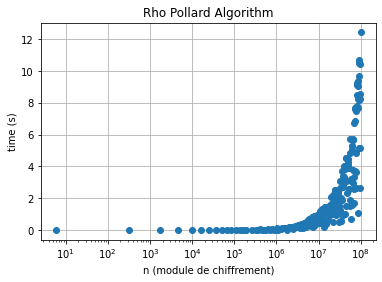

In [24]:
fig, rho = plt.subplots()
rho.plot(prime_array_rho, time_array_rho,'o')

rho.set(xlabel='n (module de chiffrement)', ylabel='time (s)',
       title='Rho Pollard Algorithm')
rho.grid()
plt.xscale("log")
fig.savefig("rho_big.png")
plt.show()

In [25]:
bits_rho = [6, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62] 
time_rho = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0005, 0.0002, 0.0008, 0.0009, 0.001, 0.0023, 0.0043, 0.0023, 0.0008, 0.0002, 0.0069, 0.0199, 0.0183, 0.0079, 0.029, 0.023]

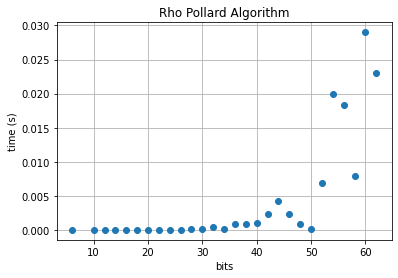

In [35]:
fig, rho = plt.subplots()
rho.plot(bits_rho, time_rho,'o')

rho.set(xlabel='bits', ylabel='time (s)',
       title='Rho Pollard Algorithm')
rho.grid()

fig.savefig("rho_small.png")
plt.show()

#### Fermat

In [2]:
time_array_fermat, prime_array_fermat = tm.time_crack(ferm.crack_primes,10000)

Couldn't crack p = 2 q = 3
p = 17 q = 19 --- 0.0 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 67 q = 71 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0004 seconds ---
p = 127 q = 131 --- 0.0019 seconds ---
p = 157 q = 163 --- 0.0014 seconds ---
p = 191 q = 193 --- 0.0014 seconds ---
p = 227 q = 229 --- 0.0038 seconds ---
p = 257 q = 263 --- 0.006 seconds ---
p = 283 q = 293 --- 0.0022 seconds ---
p = 331 q = 337 --- 0.0043 seconds ---
p = 367 q = 373 --- 0.0067 seconds ---
p = 401 q = 409 --- 0.0091 seconds ---
p = 439 q = 443 --- 0.02 seconds ---
p = 467 q = 479 --- 0.0188 seconds ---
p = 509 q = 521 --- 0.0229 seconds ---
p = 563 q = 569 --- 0.0296 seconds ---
p = 599 q = 601 --- 0.0415 seconds ---
p = 631 q = 641 --- 0.0441 seconds ---
p = 661 q = 673 --- 0.0047 seconds ---
p = 709 q = 719 --- 0.0151 seconds ---
p = 751 q = 757 --- 0.0148 seconds ---
p = 797 q = 809 --- 0.056 seconds ---
p = 829 q = 839 --- 0.0192 seconds ---
p = 877 q = 881 --- 0.0578 seconds ---
p = 919 q = 

p = 9883 q = 9887 --- 4.9158 seconds ---
p = 9931 q = 9941 --- 11.264 seconds ---
Sucess rate: 204/1
[0.0, 0.0001, 0.0003, 0.0004, 0.0019, 0.0014, 0.0014, 0.0038, 0.006, 0.0022, 0.0043, 0.0067, 0.0091, 0.02, 0.0188, 0.0229, 0.0296, 0.0415, 0.0441, 0.0047, 0.0151, 0.0148, 0.056, 0.0192, 0.0578, 0.0221, 0.033, 0.1046, 0.0278, 0.0876, 0.0647, 0.1265, 0.1286, 0.1425, 0.1244, 0.0337, 0.2032, 0.1933, 0.1132, 0.1695, 0.089, 0.1971, 0.2806, 0.2343, 0.2252, 0.2473, 0.3287, 0.0916, 0.3876, 0.202, 0.3142, 0.1581, 0.455, 0.3401, 0.1835, 0.5231, 0.37, 0.4691, 0.5777, 0.686, 0.3167, 0.3033, 0.5235, 0.7168, 0.7367, 0.1891, 0.7783, 0.7971, 0.3281, 0.6511, 0.7432, 0.9185, 0.7205, 0.3412, 0.7379, 0.5725, 0.3954, 1.2071, 1.237, 1.2239, 0.921, 1.3071, 0.6474, 0.7553, 1.1315, 0.2506, 1.1927, 1.2252, 0.383, 1.2819, 0.7878, 1.3434, 1.1797, 0.6103, 0.8766, 1.3463, 1.5199, 1.3934, 0.9591, 2.1161, 1.6765, 1.5467, 1.059, 1.6332, 0.5528, 2.2368, 1.7276, 1.6068, 2.4211, 2.6245, 1.27, 0.9119, 2.1698, 1.9861, 2.0508

Sucess rate: 204/1  
Pre calculated values for up to 10000

In [27]:
time_array_fermat = [0.0001, 0.0001, 0.0003, 0.0005, 0.0026, 0.0016, 0.0014, 0.0044, 0.0064, 0.0023, 0.0049, 0.0153, 0.0087, 0.0235, 0.0206, 0.0197, 0.026, 0.0361, 0.0443, 0.0041, 0.0186, 0.0142, 0.0569, 0.0176, 0.0494, 0.0195, 0.0307, 0.1008, 0.0241, 0.0829, 0.0675, 0.1231, 0.1243, 0.1326, 0.1222, 0.0289, 0.1948, 0.2103, 0.1403, 0.1533, 0.0766, 0.195, 0.2622, 0.2925, 0.246, 0.2267, 0.3901, 0.0922, 0.4052, 0.2021, 0.3081, 0.1738, 0.4913, 0.2843, 0.1514, 0.4397, 0.3021, 0.4026, 0.5863, 0.5812, 0.272, 0.2602, 0.4796, 0.7493, 0.6525, 0.1558, 0.7809, 0.7451, 0.3755, 0.5593, 0.6638, 0.9685, 0.6602, 0.3152, 0.6755, 0.5496, 0.3689, 1.3034, 1.2079, 1.1335, 0.8055, 1.4236, 0.6119, 0.6249, 1.2016, 0.2651, 1.1034, 1.1959, 0.3852, 1.3006, 0.7028, 1.2101, 1.092, 0.6161, 0.8442, 1.2944, 1.5889, 1.3933, 1.0849, 1.9544, 1.5792, 1.5, 0.9875, 1.512, 0.532, 2.103, 1.6648, 1.5475, 2.1935, 2.4966, 1.1803, 0.8501, 2.2316, 1.8999, 1.891, 2.3179, 2.299, 2.3072, 2.3217, 0.5385, 1.4273, 1.4879, 3.3262, 2.344, 1.093, 0.7986, 0.5988, 0.6375, 1.9435, 3.0267, 1.8067, 0.9051, 3.4219, 2.9328, 2.9134, 3.9913, 3.55, 3.4075, 3.4015, 3.0534, 1.257, 3.5046, 1.8387, 4.4902, 4.716, 2.3644, 3.7381, 4.0524, 3.5921, 4.2716, 3.9497, 3.9007, 2.5626, 2.4736, 3.8604, 1.8125, 4.7324, 1.5268, 5.6682, 2.9581, 3.2966, 0.6926, 3.0761, 1.4874, 5.0568, 5.1483, 5.208, 3.5258, 5.5522, 5.6685, 2.9445, 3.552, 2.3554, 6.8711, 1.6889, 3.7798, 8.75, 7.2993, 7.5098, 5.1172, 2.7103, 8.134, 7.6038, 3.7508, 7.2771, 8.5252, 8.5519, 8.1985, 0.9747, 6.9, 8.3217, 8.8035, 7.2466, 9.8034, 10.3513, 5.3129, 7.7111, 9.4676, 2.3101, 9.4102, 8.4091, 8.2935, 4.9216, 12.2592]
prime_array_fermat = [323, 1763, 4757, 9797, 16637, 25591, 36863, 51983, 67591, 82919, 111547, 136891, 164009, 194477, 223693, 265189, 320347, 359999, 404471, 444853, 509771, 568507, 644773, 695531, 772637, 853751, 938957, 1022117, 1089911, 1185917, 1254391, 1382951, 1488391, 1607743, 1687397, 1806047, 2005007, 2099597, 2205221, 2331713, 2461757, 2585663, 2712509, 2883203, 3041527, 3196943, 3437267, 3549431, 3767417, 3980021, 4112783, 4334723, 4498577, 4652633, 4968377, 5157437, 5336099, 5541307, 5716877, 5948717, 6199931, 6502499, 6827753, 7080917, 7241477, 7420151, 7683959, 7901657, 8173877, 8485553, 8797147, 9126437, 9443293, 9790577, 10169717, 10497479, 10889999, 11088899, 11370383, 11840417, 12110279, 12467957, 12709189, 13068221, 13432189, 13727009, 14167687, 14531263, 14884139, 15319387, 15563021, 16080091, 16434907, 16850989, 17264021, 17791523, 18113527, 18429833, 19009591, 19554083, 19998703, 20412323, 20930561, 21511043, 21790199, 22335067, 22924943, 23270927, 24068827, 24472793, 24900091, 25220483, 25847047, 26347493, 26967233, 27551857, 28153627, 28987447, 29354723, 29811479, 30305021, 30913591, 31708097, 32012963, 32558411, 33223471, 33837473, 34269307, 34680257, 35604893, 36481591, 37015031, 37601423, 38415203, 38912563, 39463499, 40018267, 40500487, 41267767, 42068171, 43007339, 43599593, 44448853, 44970427, 45846377, 46580621, 47141947, 47803387, 48566957, 49098013, 49885933, 50808383, 51839951, 52417591, 53406863, 54169519, 55562107, 56160011, 56836517, 57380621, 57972947, 58936313, 59598391, 60434851, 61575373, 62283583, 63091213, 64224187, 65351047, 65934391, 66994189, 67815221, 68707517, 69572137, 70626991, 71470067, 72794999, 73770857, 74563189, 75429209, 76125589, 76912819, 77898251, 78588221, 79869953, 80999999, 81757763, 82919227, 83887277, 84750427, 85877189, 86881037, 87871867, 88736399, 89529443, 90325967, 91565437, 92736899, 93779831, 94887077, 95824517, 96746887, 97713221, 98724071]


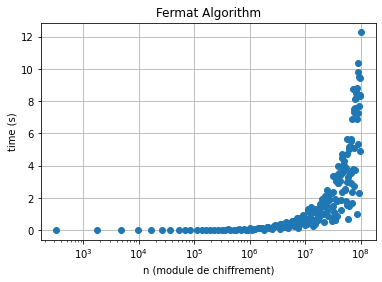

In [28]:
fig, fermat = plt.subplots()
fermat.plot(prime_array_fermat, time_array_fermat,'o')

fermat.set(xlabel='n (module de chiffrement)', ylabel='time (s)',
       title='Fermat Algorithm')
fermat.grid()
plt.xscale("log")
fig.savefig("fermat_grand.png")
plt.show()

Pre calulcated values for big numbers not done in the notebook (because it's too slow)

In [29]:
bits_fermat = [6, 8, 10, 12,14, 16,18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62]
time_fermat = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0, 0.0012, 0.0086, 0.0012, 0.0005, 0.0089, 0.0018, 0.0515, 0.366, 0.0613, 1.6567, 0.0003, 1.9363, 14.548, 24.9772]

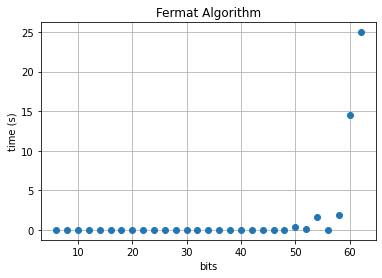

In [30]:
fig, fermat = plt.subplots()
fermat.plot(bits_fermat, time_fermat,'o')

fermat.set(xlabel='bits', ylabel='time (s)',
       title='Fermat Algorithm')
fermat.grid()

fig.savefig("fermat_small.png")
plt.show()

#### P-1 pollard:

In [7]:
time_array_p_1, prime_array_p_1 = tm.time_crack(p_1_pollard.crack_primes,10000)

p = 3 q = 2 --- 0.0 seconds ---
p = 17 q = 19 --- 0.0001 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 71 q = 67 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0004 seconds ---
p = 127 q = 131 --- 0.002 seconds ---
p = 163 q = 157 --- 0.0014 seconds ---
p = 193 q = 191 --- 0.0014 seconds ---
p = 229 q = 227 --- 0.0041 seconds ---
p = 257 q = 263 --- 0.006 seconds ---
p = 283 q = 293 --- 0.0036 seconds ---
p = 331 q = 337 --- 0.0046 seconds ---
p = 373 q = 367 --- 0.008 seconds ---
p = 401 q = 409 --- 0.0094 seconds ---
p = 443 q = 439 --- 0.033 seconds ---
p = 467 q = 479 --- 0.0632 seconds ---
p = 521 q = 509 --- 0.0231 seconds ---
p = 569 q = 563 --- 0.031 seconds ---
p = 601 q = 599 --- 0.0397 seconds ---
p = 631 q = 641 --- 0.0437 seconds ---
p = 673 q = 661 --- 0.0044 seconds ---
p = 709 q = 719 --- 0.0156 seconds ---
p = 757 q = 751 --- 0.0134 seconds ---
p = 809 q = 797 --- 0.0617 seconds ---
p = 829 q = 839 --- 0.0184 seconds ---
p = 881 q = 877 --- 0.0563 seconds ---
p = 9

p = 9883 q = 9887 --- 5.0642 seconds ---
p = 9941 q = 9931 --- 11.7723 seconds ---
Sucess rate: 204/1
[0.0, 0.0001, 0.0001, 0.0003, 0.0004, 0.002, 0.0014, 0.0014, 0.0041, 0.006, 0.0036, 0.0046, 0.008, 0.0094, 0.033, 0.0632, 0.0231, 0.031, 0.0397, 0.0437, 0.0044, 0.0156, 0.0134, 0.0617, 0.0184, 0.0563, 0.023, 0.0354, 0.1056, 0.0385, 0.096, 0.0651, 0.1273, 0.1291, 0.1366, 0.1263, 0.2031, 0.1926, 0.1158, 0.1707, 0.0909, 0.204, 0.2791, 0.2203, 0.2238, 0.2472, 0.3098, 0.0928, 0.3845, 0.2068, 0.3155, 0.1581, 0.4563, 0.3377, 0.1804, 0.519, 0.3667, 0.4719, 0.5813, 0.6932, 0.3275, 0.3046, 0.536, 0.7167, 0.7343, 0.1892, 0.8748, 1.0008, 0.3681, 0.6453, 0.8349, 1.1105, 0.7153, 0.3381, 0.7408, 0.568, 0.3978, 1.1865, 1.2833, 1.1893, 0.8729, 1.2592, 0.5885, 0.666, 1.1524, 0.2501, 1.1979, 1.2562, 0.3884, 1.2955, 0.7928, 1.3546, 1.1817, 0.6251, 0.895, 1.3439, 2.3946, 1.3941, 0.9617, 2.111, 1.6716, 1.5865, 1.0624, 1.6358, 0.5568, 2.2821, 1.7256, 1.6052, 2.4228, 2.61, 1.2661, 0.9145, 2.1749, 2.0014, 2.17

Pre calculated values for up to 10000

In [31]:
time_array_p_1 = [0.0, 0.0001, 0.0001, 0.0003, 0.0003, 0.002, 0.0019, 0.0016, 0.0046, 0.0072, 0.005, 0.0053, 0.0144, 0.0109, 0.0171, 0.0541, 0.0183, 0.0255, 0.037, 0.0454, 0.0045, 0.0133, 0.0113, 0.0588, 0.0243, 0.0584, 0.021, 0.034, 0.0951, 0.0446, 0.0951, 0.0576, 0.1095, 0.1182, 0.1576, 0.134, 0.1823, 0.1921, 0.1415, 0.1626, 0.0801, 0.2095, 0.281, 0.2093, 0.2318, 0.3549, 0.3266, 0.087, 0.4357, 0.2272, 0.3207, 0.1417, 0.467, 0.3688, 0.1994, 0.4994, 0.3407, 0.4379, 0.5269, 0.6485, 0.3285, 0.2821, 0.5315, 0.7108, 0.8379, 0.1919, 0.8199, 0.9006, 0.3154, 0.6876, 0.7778, 1.2373, 0.8053, 0.3737, 0.8271, 0.8183, 0.6564, 1.2104, 1.3017, 1.2963, 1.1832, 1.259, 0.7239, 0.6696, 1.1632, 0.2398, 1.2053, 1.3875, 0.4172, 1.4002, 0.8907, 1.3152, 1.3812, 0.577, 0.892, 1.4087, 2.6808, 1.4096, 0.924, 2.1559, 1.97, 1.5635, 1.2707, 1.7319, 0.7735, 2.4481, 1.7858, 1.6227, 2.6543, 2.9991, 1.3164, 0.9631, 2.2616, 1.9545, 2.2084, 2.3113, 2.6392, 2.5502, 2.4239, 0.602, 1.6834, 1.7443, 4.0155, 2.5827, 1.1642, 0.896, 0.5716, 0.5781, 2.1127, 3.8943, 1.9005, 1.4171, 3.4037, 3.8823, 3.0669, 4.4261, 3.6036, 3.1638, 3.6444, 2.9615, 1.12, 3.4972, 1.6108, 4.4809, 4.7448, 2.7512, 4.0245, 3.9428, 3.4408, 4.3342, 4.0228, 4.0749, 2.7078, 2.7202, 4.4515, 1.9519, 5.6055, 1.5651, 5.4449, 3.4822, 3.3174, 0.7313, 3.065, 1.7151, 5.3468, 5.7065, 5.5176, 3.5401, 5.4838, 5.9387, 3.1999, 4.0808, 4.1737, 7.4243, 1.8565, 4.9708, 8.4855, 6.8496, 9.9372, 5.8576, 3.0353, 8.4402, 8.5004, 4.5633, 8.3461, 9.6529, 9.353, 8.9358, 0.9723, 8.1987, 9.5935, 9.6645, 8.8883, 11.5081, 12.6517, 5.6759, 8.6167, 11.0262, 2.4345, 10.6413, 9.1108, 9.8131, 5.4559, 12.1245]
prime_array_p_1 = [6, 323, 1763, 4757, 9797, 16637, 25591, 36863, 51983, 67591, 82919, 111547, 136891, 164009, 194477, 223693, 265189, 320347, 359999, 404471, 444853, 509771, 568507, 644773, 695531, 772637, 853751, 938957, 1022117, 1089911, 1185917, 1254391, 1382951, 1488391, 1607743, 1687397, 2005007, 2099597, 2205221, 2331713, 2461757, 2585663, 2712509, 2883203, 3041527, 3196943, 3437267, 3549431, 3767417, 3980021, 4112783, 4334723, 4498577, 4652633, 4968377, 5157437, 5336099, 5541307, 5716877, 5948717, 6199931, 6502499, 6827753, 7080917, 7241477, 7420151, 7683959, 7901657, 8173877, 8485553, 8797147, 9126437, 9443293, 9790577, 10169717, 10497479, 10889999, 11088899, 11370383, 11840417, 12110279, 12467957, 12709189, 13068221, 13432189, 13727009, 14167687, 14531263, 14884139, 15319387, 15563021, 16080091, 16434907, 16850989, 17264021, 17791523, 18113527, 18429833, 19009591, 19554083, 19998703, 20412323, 20930561, 21511043, 21790199, 22335067, 22924943, 23270927, 24068827, 24472793, 24900091, 25220483, 25847047, 26347493, 26967233, 27551857, 28153627, 28987447, 29354723, 29811479, 30305021, 30913591, 31708097, 32012963, 32558411, 33223471, 33837473, 34269307, 34680257, 35604893, 36481591, 37015031, 37601423, 38415203, 38912563, 39463499, 40018267, 40500487, 41267767, 42068171, 43007339, 43599593, 44448853, 44970427, 45846377, 46580621, 47141947, 47803387, 48566957, 49098013, 49885933, 50808383, 51839951, 52417591, 53406863, 54169519, 55562107, 56160011, 56836517, 57380621, 57972947, 58936313, 59598391, 60434851, 61575373, 62283583, 63091213, 64224187, 65351047, 65934391, 66994189, 67815221, 68707517, 69572137, 70626991, 71470067, 72794999, 73770857, 74563189, 75429209, 76125589, 76912819, 77898251, 78588221, 79869953, 80999999, 81757763, 82919227, 83887277, 84750427, 85877189, 86881037, 87871867, 88736399, 89529443, 90325967, 91565437, 92736899, 93779831, 94887077, 95824517, 96746887, 97713221, 98724071]

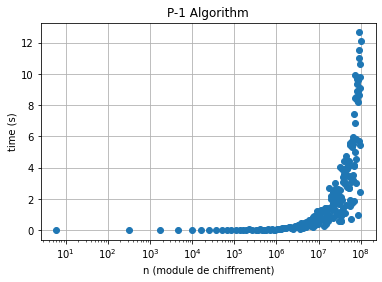

In [32]:
fig, p_1 = plt.subplots()
p_1.plot(prime_array_p_1, time_array_p_1,'o')

p_1.set(xlabel='n (module de chiffrement)', ylabel='time (s)',
       title='P-1 Algorithm')
p_1.grid()
plt.xscale("log")
fig.savefig("p_one_big.png")
plt.show()


Pre calulcated values for big numbers not done in the notebook (because it's too slow)

In [33]:
bits_p_1 = [6, 8, 10, 12, 14, 16, 18, 20, 22, 26, 28, 30, 32, 34, 36, 42, 48, 56, 62] 
time_p_1 =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.02, 0.0815, 0.052, 0.0011, 0.0013, 0.0409, 0.4159, 0.6083, 1.2154, 1.0691, 0.1458]

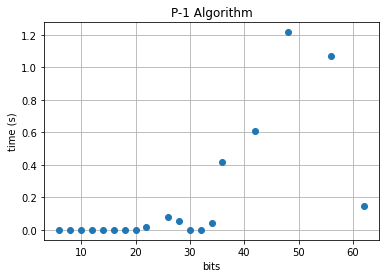

In [34]:
fig, p_1 = plt.subplots()
p_1.plot(bits_p_1, time_p_1,'o')

p_1.set(xlabel='bits', ylabel='time (s)',
       title='P-1 Algorithm')
p_1.grid()

fig.savefig("p_one_small.png")
plt.show()